In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df1 = pd.read_csv('eye_K1_00000_B0_01790.txt', sep=',')
# df2 = pd.read_csv('eye_K1_00000_B0_00800.txt', sep=',')
# df3 = pd.read_csv('eye_K1_00000_B0_02600.txt', sep=',')

In [3]:
df1.head()

,time,theta__error,theta_dot_error
0,0.000,-1.500001,-0.000390
1,0.001,-1.485894,9.404146
2,0.002,-1.464101,17.663195
3,0.003,-1.435648,24.856906
4,0.004,-1.401481,31.063411


In [4]:
df1.shape

(2893, 3)

In [62]:
S1 = -120
A0 = 0
A1 = -1.5
A2 = -180
print(A1, A2, S1)

-1.5 -180 -120


In [63]:
S1 * S1

14400

In [46]:
S1 = -110
A0 = 1
A1 = -1
A2 = -110
print(A1, A2, S1)

-1 -110 -110


In [64]:
def equation(x):
    return (A1*math.exp(S1*x)) + (A2*x*math.exp(S1*x)) 

In [65]:
def get_t_err(x):
    return 0 - equation(x)

In [66]:
df1['analysis'] = df1['time'].apply(equation)

In [67]:
df1.head()

,time,theta__error,theta_dot_error,analysis
0,0.000,-1.500001,-0.000390,-1.500000
1,0.001,-1.485894,9.404146,-1.490026
2,0.002,-1.464101,17.663195,-1.463128
3,0.003,-1.435648,24.856906,-1.423260
4,0.004,-1.401481,31.063411,-1.373699


In [68]:
equation(0.001)

-1.4900263336848245

(0, 0.25)

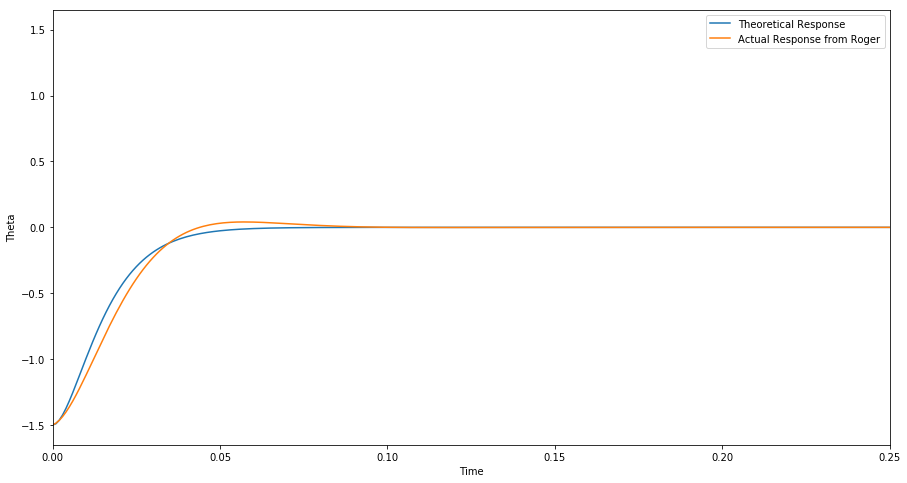

In [76]:
plt.plot(df1['time'], df1['analysis'], label='Theoretical Response')
plt.plot(df1['time'], df1[' theta__error'], label='Actual Response from Roger')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()
plt.xlim(0, 0.25)

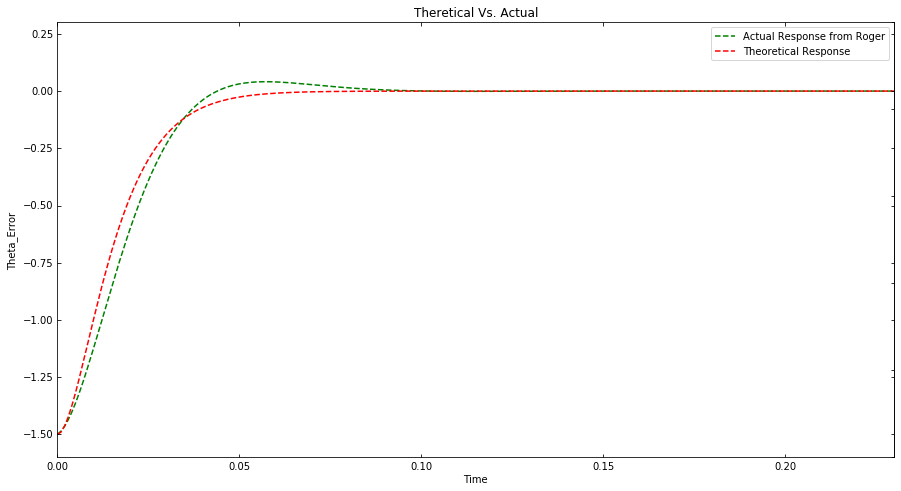

In [87]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

lim_x_min = 0
lim_x_max = 0.23
lim_y_min = -1.6
lim_y_max = 0.3

host = host_subplot(111, axes_class=AA.Axes)
# plt.subplots_adjust(right=0.75)
plt.rcParams["figure.figsize"] = 15,8

par1 = host.twinx()
par2 = host.twinx()

# offset = 60
# new_fixed_axis = par2.get_grid_helper().new_fixed_axis
# par2.axis["right"] = new_fixed_axis(loc="right",
#                                     axes=par2,
#                                     offset=(offset, 0))

# par2.axis["right"].toggle(all=True)

# host.set_xlim(1, 1.2)
host.set_xlim(lim_x_min, lim_x_max)
host.set_ylim(lim_y_min, lim_y_max)

host.set_xlabel("Time")
host.set_ylabel("Theta_Error")
# par1.set_ylabel("Temperature")
# par2.set_ylabel("Velocity")

p1, = host.plot(df1['time'], df1[' theta__error'], 'g--', label="Actual Response from Roger")
p2, = par1.plot(df1['time'], df1['analysis'], 'r--', label="Theoretical Response")
# p3, = par2.plot(df3['time'], df3[' theta__error'], 'b--', label="K=1.50000 B=0.0260")

par1.set_ylim(lim_y_min, lim_y_max)
# par2.set_ylim(lim_y_min, lim_y_max)

plt.title('Theretical Vs. Actual')
host.legend()

# host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()